In [1]:
# Washington Multiple AGN (WMAGN) Catalog DR1 - Figure Generation
# Author: R. W. Pfeifle
# Legacy Notebook Created: 10 Sept. 2020
# Figures Notebook Created: 28 March 2023
# Last Revision Date: 28 March 2023

# Purpose:
# 
# 

In [30]:
# Load in packages for pandas, astropy, etc. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii
from astropy.table import Column, MaskedColumn
from astropy.io.ascii import masked
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import LambdaCDM 
#from astroquery.simbad import Simbad
#from astroquery.sdss import SDSS

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) #Creating our choice of cosmology here...

pd.set_option('display.max_columns', 300) # Setting max number of rows per df to be the size of the df
pd.set_option('display.max_rows', None)

In [31]:
MAC = pd.read_csv('MAC_DR1_beta.csv', sep=',')

# Convert 'Sep' column to numeric, setting errors='coerce' will convert unconvertible values to NaN
MAC['Sep'] = pd.to_numeric(MAC['Sep'], errors='coerce')
MAC['z1'] = pd.to_numeric(MAC['z1'], errors='coerce')


#MAC['Sep(kpc)'] = pd.to_numeric(MAC['Sep(kpc)'], errors='coerce')
# Drop rows where 'Sep' is NaN
MAC = MAC.dropna(subset=['Sep','z1'])

# Now, you can apply the condition
MAC = MAC[(MAC['Sep'] > 0) & (MAC['z1'] > 0)]

print(len(MAC))

2947


In [32]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)  # Example: Hubble constant of 70 km/s/Mpc and matter density of 0.3

def angular_to_physical(row):
    # Calculate the angular diameter distance for the given redshift
    DA = cosmo.angular_diameter_distance(row['z1']).to(u.Mpc)

    # Convert angular separation from arcseconds to radians
    angular_separation_rad = np.radians(row['Sep'] / 3600.0)

    # Calculate the projected separation in kpc
    projected_separation_kpc = (DA * angular_separation_rad).to(u.kpc)
    
    return projected_separation_kpc.value


# Compute projected separations and add to DataFrame
MAC['Sep(kpc)'] = MAC.apply(angular_to_physical, axis=1)


In [85]:
temple['System Type'].unique()

array(['Dual AGN Candidate',
       'Dual AGN Candidate / Recoil Candidate / Binary SMBH Candidate',
       'Binary Quasar', 'Recoil Candidate', 'Binary Quasar / Lens',
       'Dual AGN', 'Dual AGN / Quasar Candidate', 'Binary SMBH Candidate',
       'Dual AGN / Binary Quasar', 'Binary SMBH',
       'Recoil Candidate / Binary SMBH Candidate',
       'Recoil Candidate / Double-Peaked Emitter',
       'Recoil Candidate / Binary Quasar Candidate'], dtype=object)

In [86]:
x = (temple['System Type']=='Binary AGN Candidate').sum() + (temple['System Type']=='Dual AGN Candidate / Recoil Candidate / Binary SMBH Candidate').sum() + (temple['System Type']=='Dual AGN / Quasar Candidate').sum() + (temple['System Type']=='Dual AGN / Binary Quasar').sum() + (temple['System Type']=='Recoil Candidate / Binary SMBH Candidate').sum() + (temple['System Type']=='Recoil Candidate / Double-Peaked Emitter').sum() + (temple['System Type']=='Recoil Candidate / Binary Quasar Candidate').sum()


types = [((temple['System Type']=='Dual AGN Candidate').sum()+(temple['System Type']=='Dual AGN').sum()), \
         (temple['System Type']=='Binary Quasar / Lens').sum(), \
         ((temple['System Type']=='Binary Quasar').sum()+(temple['System Type']=='Binary Quasar Candidate').sum()), \
         ((temple['System Type']=='Binary SMBH Candidate').sum()+(temple['System Type']=='Binary SMBH').sum()), \
         (temple['System Type']=='Recoil Candidate').sum(),6]

classes = ['Dual AGNs + Candidates', 'Binary Quasars / Lenses', 'Binary Quasars + Candidates', 'Binary SMBHs + Candidates', \
           'Recoil Candidates', 'Other']


In [87]:
x

6

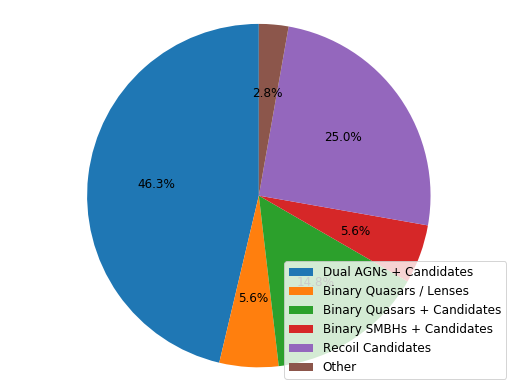

In [88]:

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(8,6))
plt.rcParams.update({'font.size': 12})
plt.tight_layout()

ax.pie(types, labels=None, autopct='%1.1f%%', startangle=90)
#shadow=True,
#explode=explode,
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="lower right", labels=classes)

#plt.savefig('classdistr_dr0p1.pdf', dpi=150)


plt.show()

In [3]:
temple = temple.loc[temple['Name1']!='Q0101.8-3012A']



In [52]:
# Now converting the coordinates so that we can map them onto an Aitoff projection map

coords1 = SkyCoord(ra=temple['RA1_deg'], dec=temple['Dec1_deg'], frame='icrs', unit='deg') #Making a SkyCoord object from the degree coordinates

coords2 = SkyCoord(ra=temple['RA2_deg'], dec=temple['Dec2_deg'], frame='icrs', unit='deg') #Making a SkyCoord object from the degree coordinates


# Now converting to radians, which is required by Matplotlib. Also required that the coordinates fall between \
# -pi and +pi , not 0 and 2pi, so also taking that into account here...
coords_ra_rad1 = coords1.ra.wrap_at(180 * u.deg).radian 
coords_dec_rad1 = coords1.dec.radian

coords_ra_rad2 = coords2.ra.wrap_at(180 * u.deg).radian 
coords_dec_rad2 = coords2.dec.radian


In [57]:
coordconvert = SkyCoord(ra = xliu2011['RA'], dec = xliu2011['Dec'], frame='icrs', unit = (u.hourangle, u.deg))

coords_ra_rad3 = coordconvert.ra.wrap_at(180 * u.deg).radian 
coords_dec_rad3 = coordconvert.dec.radian

#xliu2011['RA_deg'] = coordconvert.ra.degree
#xliu2011['Dec_deg'] = coordconvert.dec.degree


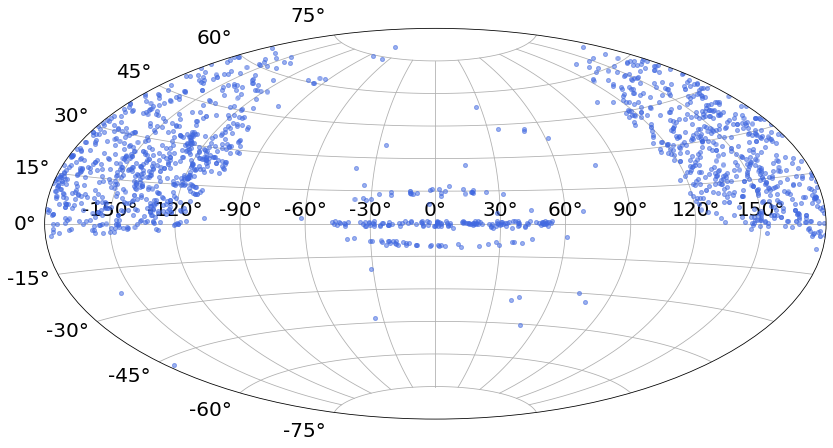

In [97]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12,8))
plt.subplot(111, projection="aitoff")
#plt.title("Sky Distribution of WMAGN")
plt.grid(True)
plt.plot(coords_ra_rad1, coords_dec_rad1, 'o', markersize=4, alpha=0.3, c='royalblue')
plt.plot(coords_ra_rad2, coords_dec_rad2, 'o', markersize=4, alpha=0.3, c='royalblue')
plt.plot(coords_ra_rad3, coords_dec_rad3, 'o', markersize=4, alpha=0.3, c='royalblue')

#plt.plot(wang_ra_rad, wang_dec_rad, '^', markersize=4, alpha=0.3, c='firebrick', label='Wang+2009')
#plt.plot(myers_ra_rad, myers_dec_rad, 's', markersize=4, alpha=0.3, c='forestgreen', label='Myers+2007')
#plt.plot(kirkman_ra_rad, kirkman_dec_rad, 'v', markersize=4, alpha=0.3, c='blueviolet', label='Kirkman+2008')
#plt.plot(tytler_ra_rad, tytler_dec_rad, 'D', markersize=4, alpha=0.3, c='darkorange', label='Tytler+2009')
#plt.plot(kyber_ra_rad, kyber_dec_rad, '*', markersize=4, alpha=0.3, c='black' , label='Individual Targets')
#plt.legend(loc='lower right')
plt.subplots_adjust(top=0.95,bottom=0.0)
plt.tight_layout()
plt.savefig('Skydistribution_wmagn.pdf', dpi=150)
plt.show()


In [10]:
from matplotlib.ticker import PercentFormatter

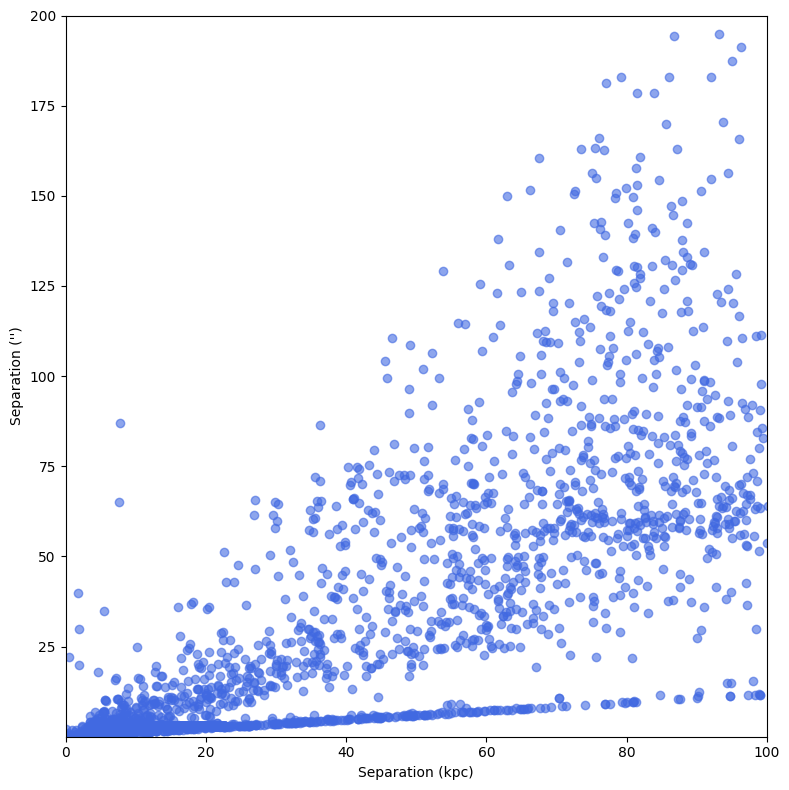

In [36]:
#Here I'm plotting the WISE colors and adding the Jarrett box and the Stern cut
#Constructing a grid of subplots showing the WISE color space

fig, ax = plt.subplots(figsize = (8,8))
ax.set_xlim([-0.01, 100])
ax.set_ylim([0.01, 200])

im1 = ax.scatter(x=MAC['Sep(kpc)'], y=MAC['Sep'], c='royalblue', alpha=0.6)
#ax.set_yscale("log")
#ax.set_xscale("log")
#im2 = ax.scatter(x=MAC['rp'], y=MAC['sep'], c='royalblue', alpha=0.6) 
#ax1.plot(x, y,'--', linewidth = 2, color = 'k')
#ax1.vlines(x = 2.2, ymin = 2.2*0.1+0.38, ymax = 1.7, linestyle = '--', alpha = 1, linewidth = 2)
#ax1.vlines(x = 4.2, ymin = 4.2*0.1+0.38, ymax = 1.7, linestyle = '--', alpha = 1, linewidth = 2)
#ax1.hlines(y = 1.7, xmin = 2.2, xmax = 4.2, linestyle='--', alpha=1, linewidth = 2)

#plotting the Stern 2012 cut
#ax1.hlines(y = 0.8, xmin = 1, xmax = 5, linestyle = '-.', alpha = 1, linewidth = 2)

ax.set(xlabel="Separation (kpc)", ylabel="Separation ('')")

#cbar = fig.colorbar(im1,ax=ax)
#cbar.ax.set_ylabel('log($L_{2-10\,\mathrm{keV,\,Obs.}}\,/\,\mathrm{erg\,s}^{-1}$)')

plt.tight_layout()
#plt.savefig('WMAGN_arcsec_v_kpc.pdf', dpi=150)

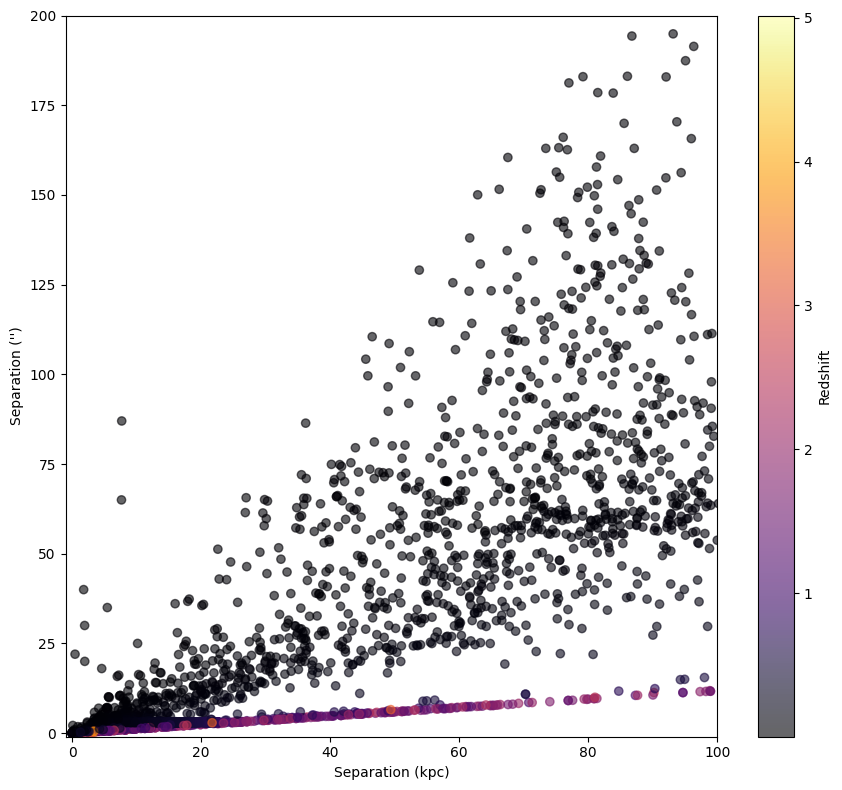

In [37]:
#Here I'm plotting the WISE colors and adding the Jarrett box and the Stern cut
#Constructing a grid of subplots showing the WISE color space

fig, ax = plt.subplots(figsize = (9,8))
ax.set_xlim([-1, 100])
ax.set_ylim([-1, 200])

#im1 = ax.scatter(x=temple['Sep(kpc)'], y=temple['Sep'], c=temple['z1'], cmap='inferno', alpha=0.6)
im2 = ax.scatter(x=MAC['Sep(kpc)'], y=MAC['Sep'], c=MAC['z1'], cmap='inferno', alpha=0.6) 

ax.set(xlabel="Separation (kpc)", ylabel="Separation ('')")

cbar = fig.colorbar(im2,ax=ax)
cbar.ax.set_ylabel('Redshift')

plt.tight_layout()
#plt.savefig('WMAGN_arcsec_v_kpc_aux.pdf', dpi=150)

In [3]:
xmm = pd.read_csv('../../Desktop/liu_matches_to_xmmlog.csv', sep=',')

In [40]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


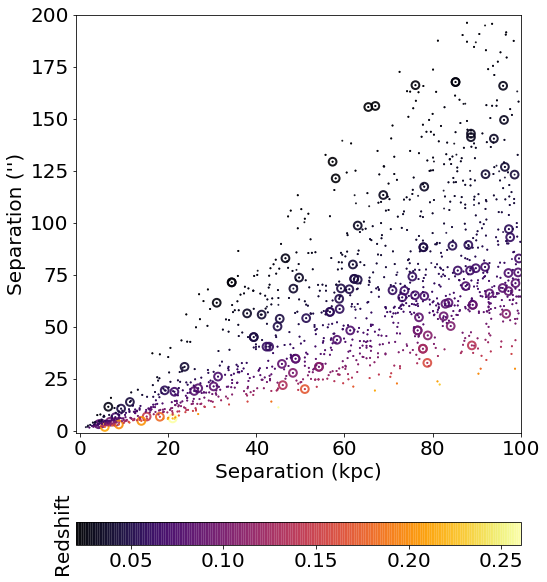

In [38]:
#Here I'm plotting the WISE colors and adding the Jarrett box and the Stern cut
#Constructing a grid of subplots showing the WISE color space

fig, ax = plt.subplots(figsize = (8,9))
ax.set_xlim([-1, 100])
ax.set_ylim([-1, 200])
plt.rcParams.update({'font.size': 20})

im1 = ax.scatter(x=xmm['rp'], y=xmm['sep'], c=xmm['z'], alpha=0.9, marker='o', s=60, \
                 facecolors='none', cmap='inferno',linewidths=2)
im2 = ax.scatter(x=xliu2011['rp'], y=xliu2011['sep'], c=xliu2011['z'], cmap='inferno', marker="o", alpha=0.8, s=1) 

im1.set_facecolor('none')

ax.set(xlabel="Separation (kpc)", ylabel="Separation ('')")

cbar = fig.colorbar(im2,ax=ax, orientation='horizontal')
cbar.ax.set_ylabel('Redshift')

plt.tight_layout()
plt.savefig('WMAGN_arcsec_v_kpc_aux2.pdf', dpi=300)


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_31605/3741667208.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


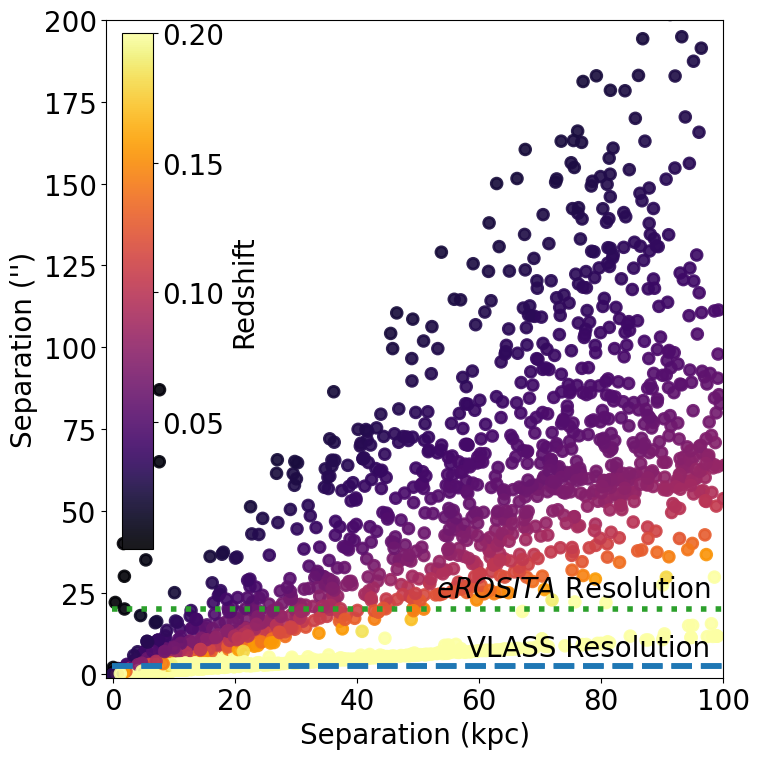

In [75]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Sample data
#MAC = {'Sep(kpc)': [some_data], 'Sep': [some_data], 'z1': [some_data]}

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-1, 100])
ax.set_ylim([-1, 200])
plt.rcParams.update({'font.size': 20})

im1 = ax.scatter(x=MAC['Sep(kpc)'], y=MAC['Sep'], c=MAC['z1'], alpha=0.9, marker='o', s=60, \
                 facecolors='none', cmap='inferno',linewidths=2, vmax=0.2)

axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="80%",  # height : 50%
                   loc='upper left',
                   bbox_to_anchor=(0.025, 0., 1, 0.98),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

ax.set(xlabel="Separation (kpc)", ylabel="Separation ('')")

ax.hlines(2.5,-0.01,100, linestyle='dashed', linewidth=4, color='tab:blue')

ax.text(78, 8, 'VLASS Resolution', ha='center', va='center', zorder=5)
ax.hlines(2.5,-0.01,100, linestyle='dashed', linewidth=4, color='tab:blue')

ax.text(75.5, 26, '$eROSITA$ Resolution', ha='center', va='center', zorder=5)
ax.hlines(20,-0.01,100, linestyle='dotted', linewidth=4, color='tab:green')

# Use im1 to create the colorbar
cbar = fig.colorbar(im1, cax=axins, orientation="vertical", ticks=[0.05, 0.1, 0.15, 0.2])
cbar.ax.set_ylabel('Redshift')
axins.xaxis.set_ticks_position("bottom")

plt.tight_layout()
plt.savefig('BigMAC_arcsec_v_kpc_aux.pdf', dpi=300)
plt.show()




In [17]:
#np.max(xliu2011['z'])

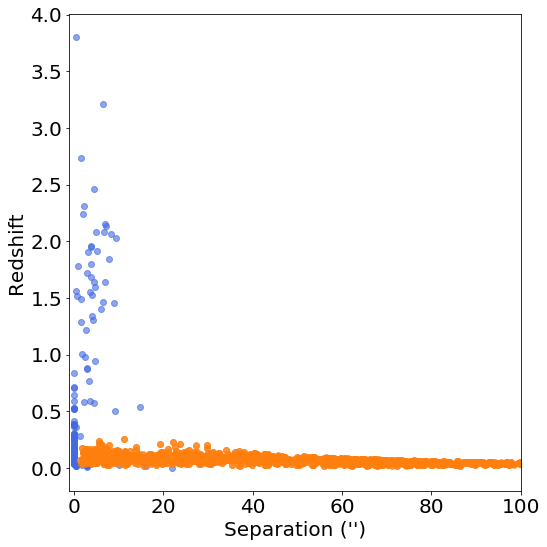

In [106]:
#Here I'm plotting the WISE colors and adding the Jarrett box and the Stern cut
#Constructing a grid of subplots showing the WISE color space

fig, ax = plt.subplots(figsize = (8,8))
ax.set_xlim([-1, 100])
#ax.set_ylim([-1, 200])

im1 = ax.scatter(x=temple['Sep'], y=temple['z1'], c='royalblue', alpha=0.6)
im2 = ax.scatter(x=xliu2011['sep'], y=xliu2011['z'], c='tab:orange', alpha=0.6) 
#ax1.plot(x, y,'--', linewidth = 2, color = 'k')
#ax1.vlines(x = 2.2, ymin = 2.2*0.1+0.38, ymax = 1.7, linestyle = '--', alpha = 1, linewidth = 2)
#ax1.vlines(x = 4.2, ymin = 4.2*0.1+0.38, ymax = 1.7, linestyle = '--', alpha = 1, linewidth = 2)
#ax1.hlines(y = 1.7, xmin = 2.2, xmax = 4.2, linestyle='--', alpha=1, linewidth = 2)

#plotting the Stern 2012 cut
#ax1.hlines(y = 0.8, xmin = 1, xmax = 5, linestyle = '-.', alpha = 1, linewidth = 2)

ax.set(xlabel="Separation ('')", ylabel="Redshift")

#cbar = fig.colorbar(im1,ax=ax)
#cbar.ax.set_ylabel('log($L_{2-10\,\mathrm{keV,\,Obs.}}\,/\,\mathrm{erg\,s}^{-1}$)')

plt.tight_layout()
plt.savefig('WMAGN_arcsec_v_z.pdf', dpi=150)

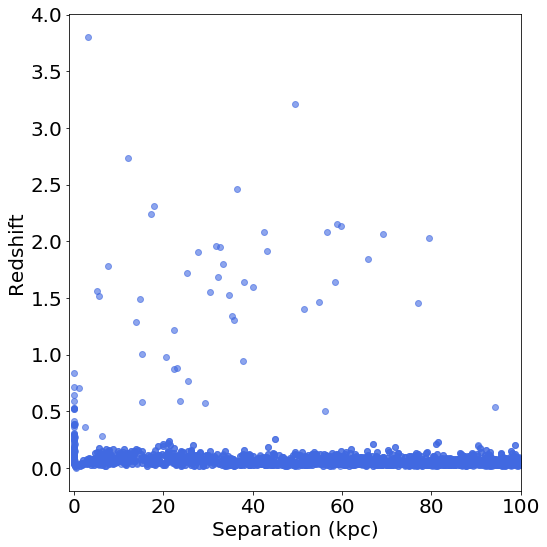

In [107]:
#Here I'm plotting the WISE colors and adding the Jarrett box and the Stern cut
#Constructing a grid of subplots showing the WISE color space

fig, ax = plt.subplots(figsize = (8,8))
ax.set_xlim([-1, 100])
#ax.set_ylim([-1, 200])

im1 = ax.scatter(x=temple['Sep(kpc)'], y=temple['z1'], c='royalblue', alpha=0.6)
im2 = ax.scatter(x=xliu2011['rp'], y=xliu2011['z'], c='royalblue', alpha=0.6) 
#ax1.plot(x, y,'--', linewidth = 2, color = 'k')
#ax1.vlines(x = 2.2, ymin = 2.2*0.1+0.38, ymax = 1.7, linestyle = '--', alpha = 1, linewidth = 2)
#ax1.vlines(x = 4.2, ymin = 4.2*0.1+0.38, ymax = 1.7, linestyle = '--', alpha = 1, linewidth = 2)
#ax1.hlines(y = 1.7, xmin = 2.2, xmax = 4.2, linestyle='--', alpha=1, linewidth = 2)

#plotting the Stern 2012 cut
#ax1.hlines(y = 0.8, xmin = 1, xmax = 5, linestyle = '-.', alpha = 1, linewidth = 2)

ax.set(xlabel="Separation (kpc)", ylabel="Redshift")

#cbar = fig.colorbar(im1,ax=ax)
#cbar.ax.set_ylabel('log($L_{2-10\,\mathrm{keV,\,Obs.}}\,/\,\mathrm{erg\,s}^{-1}$)')

plt.tight_layout()
plt.savefig('WMAGN_kpc_v_z.pdf', dpi=150)

In [65]:
temple

,index,System Type,Literature Name,Name1,Selection Method,Confirmation Method,z1,z1_type,RA1,Dec1,RA1_deg,Dec1_deg,Equinox,Coordinate_waveband1,Coordinate_Source1,Brightness1,Brightness_band1,Brightness_type1,Name2,z2,z2_type,RA2,Dec2,RA2_deg,Dec2_deg,Coordinate_waveband2,Coordinate_Source2,Brightness2,Brightness_band2,Brightness_type2,Sep,Sep(kpc),delta_z,dV,Paper(s),BibCode(s),DOI(s),Notes
0,0,Dual AGN Candidate,J000249+004504,J000249+004504,Double-Peaked Optical Spectroscopic Emission L...,-99,0.086620,spec,00:02:49,+00:45:04,0.704167,0.751111,J2000,Optical,SDSS,-100.000,-100,-100,J000249+004504,0.086620,spec,00:02:49,+00:45:04,0.704167,0.751111,Optical,SDSS,-100.000,-100,-100,3.000000,4.86705,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
1,1,Dual AGN Candidate,J000656+154847,J000656+154847,Double-Peaked Optical Spectroscopic Emission L...,-99,0.125150,spec,00:06:56,+15:48:47,1.733333,15.813056,J2000,Optical,SDSS,-100.000,-100,-100,J000656+154847,0.125150,spec,00:06:56,+15:48:47,1.733333,15.813056,Optical,SDSS,-100.000,-100,-100,3.000000,6.72889,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
2,2,Dual AGN Candidate,J013555+143529,J013555+143529,Double-Peaked Optical Spectroscopic Emission L...,-99,0.072080,spec,01:35:55,+14:35:29,23.979167,14.591389,J2000,Optical,SDSS,-100.000,-100,-100,J013555+143529,0.072080,spec,01:35:55,+14:35:29,23.979167,14.591389,Optical,SDSS,-100.000,-100,-100,3.000000,4.11911,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
3,3,Dual AGN Candidate,J014209-005049,J014209-005049,Double-Peaked Optical Spectroscopic Emission L...,-99,0.132530,spec,01:42:09,-00:50:49,25.537500,-0.846944,J2000,Optical,SDSS,-100.000,-100,-100,J014209-005049,0.132530,spec,01:42:09,-00:50:49,25.537500,-0.846944,Optical,SDSS,-100.000,-100,-100,3.000000,7.06662,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
4,4,Dual AGN Candidate,J015605-000721,J015605-000721,Double-Peaked Optical Spectroscopic Emission L...,-99,0.080840,spec,01:56:05,-00:07:21,29.020833,-0.122500,J2000,Optical,SDSS,-100.000,-100,-100,J015605-000721,0.080840,spec,01:56:05,-00:07:21,29.020833,-0.122500,Optical,SDSS,-100.000,-100,-100,3.000000,4.57282,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
5,5,Dual AGN Candidate,J073509+403624,J073509+403624,Double-Peaked Optical Spectroscopic Emission L...,-99,0.102970,spec,07:35:09,+40:36:24,113.787500,40.606667,J2000,Optical,SDSS,-100.000,-100,-100,J073509+403624,0.102970,spec,07:35:09,+40:36:24,113.787500,40.606667,Optical,SDSS,-100.000,-100,-100,3.000000,5.67784,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
6,6,Dual AGN Candidate,J074729+344018,J074729+344018,Double-Peaked Optical Spectroscopic Emission L...,-99,0.129820,spec,07:47:29,+34:40:18,116.870833,34.671667,J2000,Optical,SDSS,-100.000,-100,-100,J074729+344018,0.129820,spec,07:47:29,+34:40:18,116.870833,34.671667,Optical,SDSS,-100.000,-100,-100,3.000000,6.94328,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
7,7,Dual AGN Candidate,J074953+451454,J074953+451454,Double-Peaked Optical Spectroscopic Emission L...,-99,0.031320,spec,07:49:53,+45:14:54,117.470833,45.248333,J2000,Optical,SDSS,-100.000,-100,-100,J074953+451454,0.031320,spec,07:49:53,+45:14:54,117.470833,45.248333,Optical,SDSS,-100.000,-100,-100,3.000000,1.87826,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
8,8,Dual AGN Candidate,J075223+273643,J075223+273643,Double-Peaked Optical Spectroscopic Emission L...,-99,0.069080,spec,07:52:23,+27:36:43,118.095833,27.611944,J2000,Optical,SDSS,-100.000,-100,-100,J075223+273643,0.069080,spec,07:52:23,+27:36:43,118.095833,27.611944,Optical,SDSS,-100.000,-100,-100,3.000000,3.96153,

<BarContainer object of 20 artists>

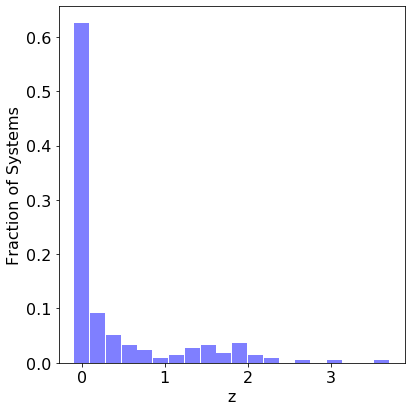

In [93]:
plt.rcParams.update({'font.size': 16})

plt.figure(tight_layout=True, figsize=(6,6))
plt.subplot(111)
#plt.title('Redshift Distribution in WMAGN')
#Remove NaN so we can plot
sith = temple[temple['z1']>0]
heights, bins = np.histogram(sith['z1'],bins=20)
heights = heights/sum(heights)
plt.ylabel('Fraction of Systems')
plt.xlabel('z')
plt.bar(bins[:-1],heights,width=(max(bins) - min(bins))/len(bins), color="blue", alpha=0.5)
#plt.savefig('Redshiftdistribution_dr0p1.pdf', dpi=150)



(array([135.,  20.,  11.,   7.,   5.,   2.,   3.,   6.,   7.,   4.,   8.,
          3.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([1.0000e-03, 1.9110e-01, 3.8120e-01, 5.7130e-01, 7.6140e-01,
        9.5150e-01, 1.1416e+00, 1.3317e+00, 1.5218e+00, 1.7119e+00,
        1.9020e+00, 2.0921e+00, 2.2822e+00, 2.4723e+00, 2.6624e+00,
        2.8525e+00, 3.0426e+00, 3.2327e+00, 3.4228e+00, 3.6129e+00,
        3.8030e+00]),
 <a list of 20 Patch objects>)

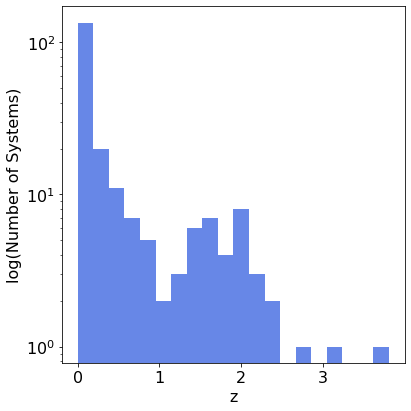

In [94]:
plt.rcParams.update({'font.size': 16})

plt.figure(tight_layout=True, figsize=(6,6))
plt.subplot(111)
#plt.title('Redshift Distribution in WMAGN')
#Remove NaN so we can plot
sith = temple[temple['z1']>0]
plt.ylabel('log(Number of Systems)')
plt.xlabel('z')
plt.hist(sith['z1'], bins=20, color="royalblue", log=True, alpha=0.8)
#plt.savefig('Redshiftdistribution_dr0p1.pdf', dpi=150)



<BarContainer object of 20 artists>

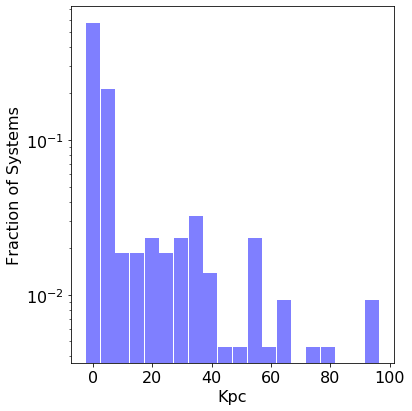

In [95]:
plt.figure(tight_layout=True, figsize=(6,6))
plt.subplot(111)
#plt.title('Projected Separations in WMAGN')
jedi = temple[temple['Sep(kpc)']>=0]
heights, bins = np.histogram(jedi['Sep(kpc)'],bins=20)
heights = heights/sum(heights)
plt.xlabel('Kpc')
plt.ylabel('Fraction of Systems')
plt.bar(bins[:-1],heights,width=(max(bins) - min(bins))/len(bins), log=True, color="blue", alpha=0.5)
#plt.savefig('Projsepdistribution_dr0p1.pdf', dpi=150)



(array([124.,  46.,   4.,   4.,   5.,   4.,   5.,   7.,   3.,   1.,   1.,
          5.,   1.,   2.,   0.,   1.,   1.,   0.,   0.,   2.]),
 array([0.0, 4.954889232872682, 9.909778465745363, 14.864667698618046,
        19.819556931490727, 24.774446164363408, 29.729335397236092,
        34.68422463010877, 39.63911386298145, 44.594003095854134,
        49.548892328726815, 54.503781561599496, 59.458670794472184,
        64.41356002734486, 69.36844926021755, 74.32333849309022,
        79.2782277259629, 84.2331169588356, 89.18800619170827,
        94.14289542458096, 99.09778465745363], dtype=object),
 <a list of 20 Patch objects>)

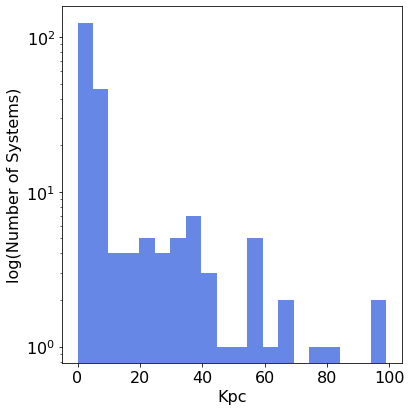

In [96]:

plt.figure(tight_layout=True, figsize=(6,6))
plt.subplot(111)
#plt.title('Redshift Distribution in WMAGN')
#Remove NaN so we can plot
sith = temple[temple['Sep(kpc)']>=0]
plt.ylabel('log(Number of Systems)')
plt.xlabel('Kpc')
plt.hist(sith['Sep(kpc)'], bins=20, color="royalblue", log=True, alpha=0.8)
#plt.savefig('Projsepdistribution_dr0p1.pdf', dpi=150)


<BarContainer object of 20 artists>

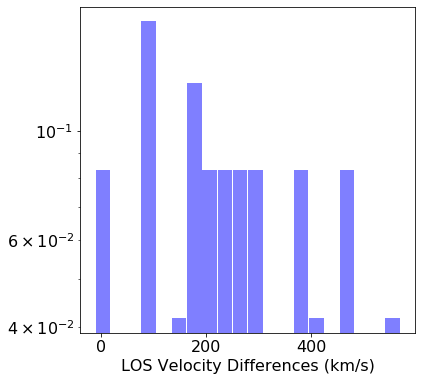

In [97]:
plt.figure(figsize=(6,6))
plt.subplot(111)
#plt.title('Line of Sight Velocity Differences from Hennawi+2006 Pairs')
grey = temple[np.abs(temple['dV'])>0]
heights, bins = np.histogram(np.abs(grey['dV']), bins=20)
heights = heights/sum(heights)
plt.xlabel('LOS Velocity Differences (km/s)')
plt.bar(bins[:-1],heights,width=(max(bins) - min(bins))/len(bins), log=True, color="blue", alpha=0.5)






In [374]:
test = pd.read_csv('WMAGN_DR0p1.csv', delimiter=',')

In [375]:
test

,System Type,Literature Name,Name1,Selection Method,Confirmation Method,z1,z1_type,RA1,Dec1,RA1_deg,Dec1_deg,Equinox,Coordinate_waveband1,Coordinate_Source1,Brightness1,Brightness_band1,Brightness_type1,Name2,z2,z2_type,RA2,Dec2,RA2_deg,Dec2_deg,Coordinate_waveband2,Coordinate_Source2,Brightness2,Brightness_band2,Brightness_type2,Sep,Sep(kpc),delta_z,dV,Paper(s),BibCode(s),DOI(s),Notes
0,Dual AGN Candidate,J000249+004504,J000249+004504,Double-Peaked Optical Spectroscopic Emission L...,-99,0.086620,spec,00:02:49,+00:45:04,0.704167,0.751111,J2000,Optical,SDSS,-100.000,-100,-100,J000249+004504,0.086620,spec,00:02:49,+00:45:04,0.704167,0.751111,Optical,SDSS,-100.000,-100,-100,3.000000,4.867052,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
1,Dual AGN Candidate,J000656+154847,J000656+154847,Double-Peaked Optical Spectroscopic Emission L...,-99,0.125150,spec,00:06:56,+15:48:47,1.733333,15.813056,J2000,Optical,SDSS,-100.000,-100,-100,J000656+154847,0.125150,spec,00:06:56,+15:48:47,1.733333,15.813056,Optical,SDSS,-100.000,-100,-100,3.000000,6.728888,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
2,Dual AGN Candidate,J013555+143529,J013555+143529,Double-Peaked Optical Spectroscopic Emission L...,-99,0.072080,spec,01:35:55,+14:35:29,23.979167,14.591389,J2000,Optical,SDSS,-100.000,-100,-100,J013555+143529,0.072080,spec,01:35:55,+14:35:29,23.979167,14.591389,Optical,SDSS,-100.000,-100,-100,3.000000,4.119105,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
3,Dual AGN Candidate,J014209-005049,J014209-005049,Double-Peaked Optical Spectroscopic Emission L...,-99,0.132530,spec,01:42:09,-00:50:49,25.537500,-0.846944,J2000,Optical,SDSS,-100.000,-100,-100,J014209-005049,0.132530,spec,01:42:09,-00:50:49,25.537500,-0.846944,Optical,SDSS,-100.000,-100,-100,3.000000,7.066624,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
4,Dual AGN Candidate,J015605-000721,J015605-000721,Double-Peaked Optical Spectroscopic Emission L...,-99,0.080840,spec,01:56:05,-00:07:21,29.020833,-0.122500,J2000,Optical,SDSS,-100.000,-100,-100,J015605-000721,0.080840,spec,01:56:05,-00:07:21,29.020833,-0.122500,Optical,SDSS,-100.000,-100,-100,3.000000,4.572819,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
5,Dual AGN Candidate,J073509+403624,J073509+403624,Double-Peaked Optical Spectroscopic Emission L...,-99,0.102970,spec,07:35:09,+40:36:24,113.787500,40.606667,J2000,Optical,SDSS,-100.000,-100,-100,J073509+403624,0.102970,spec,07:35:09,+40:36:24,113.787500,40.606667,Optical,SDSS,-100.000,-100,-100,3.000000,5.677844,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
6,Dual AGN Candidate,J074729+344018,J074729+344018,Double-Peaked Optical Spectroscopic Emission L...,-99,0.129820,spec,07:47:29,+34:40:18,116.870833,34.671667,J2000,Optical,SDSS,-100.000,-100,-100,J074729+344018,0.129820,spec,07:47:29,+34:40:18,116.870833,34.671667,Optical,SDSS,-100.000,-100,-100,3.000000,6.943283,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
7,Dual AGN Candidate,J074953+451454,J074953+451454,Double-Peaked Optical Spectroscopic Emission L...,-99,0.031320,spec,07:49:53,+45:14:54,117.470833,45.248333,J2000,Optical,SDSS,-100.000,-100,-100,J074953+451454,0.031320,spec,07:49:53,+45:14:54,117.470833,45.248333,Optical,SDSS,-100.000,-100,-100,3.000000,1.878260,0.000000,0.000000,Wang+2009,2009ApJ...705L..76W,https://doi.org/10.1088/0004-637X/705/1/L76,NaN
8,Dual AGN Candidate,J075223+273643,J075223+273643,Double-Peaked Optical Spectroscopic Emission L...,-99,0.069080,spec,07:52:23,+27:36:43,118.095833,27.611944,J2000,Optical,SDSS,-100.000,-100,-100,J075223+273643,0.069080,spec,07:52:23,+27:36:43,118.095833,27.611944,Optical,SDSS,-100.000,-100,-100,3.000000,3.961534,0.000000,0.0000